### Name: Bhavesh Kewalramani
### Roll No.: A-25
### Section: A
### Semester: V
### Shift: I
### Batch: A1

# Part-B Logistic Regression

#### 5. Perform logistic regression on the admission dataset
#### a) Import nyu_admission_fake.csv dataset, display it, visualize various columns
#### b) Plot the dataset on gpa vs. admit score.
#### c) Find the slope and intercept of the line to fit.
#### d) Compute the log odds for each entry. Merge the results with the data as a new column
#### e) Using the log odds compute the probability for each entry.
#### f) Plot the probabilities vs gpa graph.
#### g) Show the decision boundary of the regression model.
#### h) Show the accuracy of the regressor model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
dataset = pd.read_csv('admission.csv')
dataset2=dataset.copy()

In [3]:
dataset

admit    gre   gpa  rank
0      0.0  380.0  3.61   3.0
1      1.0  660.0  3.67   3.0
2      1.0  800.0  4.00   1.0
3      1.0  640.0  3.19   4.0
4      0.0  520.0  2.93   4.0
..     ...    ...   ...   ...
395    0.0  620.0  4.00   2.0
396    0.0  560.0  3.04   3.0
397    0.0  460.0  2.63   2.0
398    0.0  700.0  3.65   2.0
399    0.0  600.0  3.89   3.0

[400 rows x 4 columns]

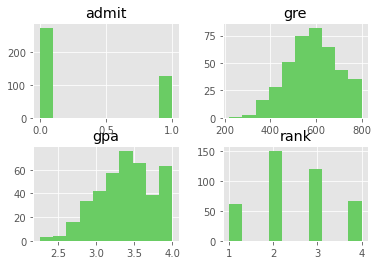

In [4]:
sns.set_color_codes('muted')
dataset.hist(color='g')
plt.show()

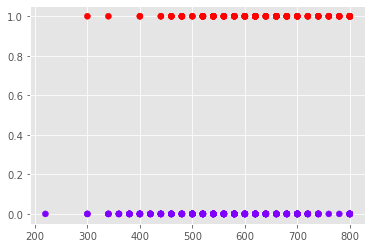

In [5]:
plt.scatter(dataset['gre'], dataset['admit'],c=dataset['admit'], cmap='rainbow')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

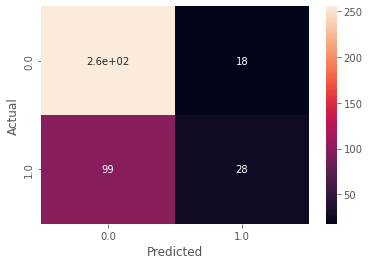

In [25]:
logreg = LogisticRegression(random_state=0)
x = dataset[['gre','gpa','rank']]
y = dataset['admit']
logreg.fit(x, y)
y_pred=logreg.predict(x)

confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
accuracy_percentage = 100 * accuracy

print("Accuracy : ",accuracy_percentage)

Accuracy :  70.75


In [8]:
b = logreg.intercept_[0]

In [9]:
w1,w2,w3 = logreg.coef_.T

In [10]:
column_names = list(x.columns)
coefficients = np.transpose(logreg.coef_)

intercept = logreg.intercept_

Coeffs = pd.DataFrame(coefficients, column_names, columns=['Coefficients'])
Coeffs.append(pd.DataFrame(intercept,['Intercept'], columns=['Coefficients']))

Coefficients
gre            0.002384
gpa            0.701171
rank          -0.549881
Intercept     -3.266626

In [11]:
y_pred_proba_1 = logreg.predict_proba(x)[:,1]
y_pred_proba_0 = logreg.predict_proba(x)[:,0]
odds = y_pred_proba_1 / y_pred_proba_0
log_odds = np.log(odds)

In [12]:
dataset2['y_pred_proba_1'] = y_pred_proba_1
dataset2['y_pred_proba_0'] = y_pred_proba_0
dataset2['Log Odds'] = log_odds
dataset2['Odd Ratio'] = odds

In [13]:
dataset2.head()

admit    gre   gpa  rank  y_pred_proba_1  y_pred_proba_0  Log Odds  \
0    0.0  380.0  3.61   3.0        0.185570        0.814430 -1.479053   
1    1.0  660.0  3.67   3.0        0.316606        0.683394 -0.769414   
2    1.0  800.0  4.00   1.0        0.710028        0.289972  0.895519   
3    1.0  640.0  3.19   4.0        0.154003        0.845997 -1.703541   
4    0.0  520.0  2.93   4.0        0.102298        0.897702 -2.171946   

   Odd Ratio  
0   0.227853  
1   0.463284  
2   2.448606  
3   0.182038  
4   0.113956

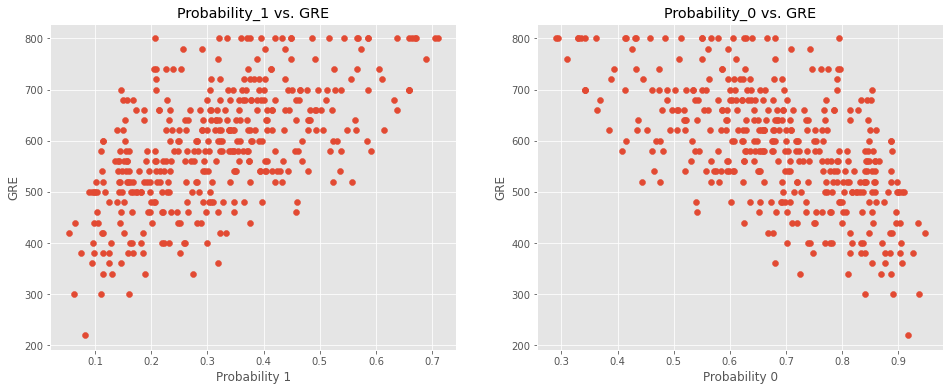

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.set_title('Probability_1 vs. GRE')
ax1.set(xlabel='Probability 1', ylabel='GRE')
ax1.scatter(y_pred_proba_1, dataset['gre'])
ax2.set_title('Probability_0 vs. GRE')
ax2.set(xlabel='Probability 0', ylabel='GRE')
ax2.scatter(y_pred_proba_0, dataset['gre']);

In [15]:
X = dataset.iloc[:, :2]  # Take only the first two features.        
y = dataset.admit
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

# Implement 3 Logistic Regression models with varying values of C
clf = LogisticRegression(C=0.01)
clf.fit(X, y)

clf2 = LogisticRegression(C=1)
clf2.fit(X, y)

clf3 = LogisticRegression(C=100)
clf3.fit(X, y)

# Define our usual decision surface bounding plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)


In [16]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=True)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=0.01)',
    hovermode= 'closest',
    showlegend= False)
    
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)       
py.iplot(fig)


Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=1)',
    hovermode= 'closest',
    showlegend= False)

data = [trace3, trace4]
fig2 = go.Figure(data=data,layout= layout)   

for i in map(str, range(1, 2)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig2)



In [21]:
y_pred=logreg.predict(x)

print("Accuracy Score:", logreg.accuracy_score(y,y_pred))

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



ValueError: Expected 2D array, got scalar array instead:
array=xaxis1.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Perform logistic regression on the credit card dataset
#### a) Download credit card fraud detection dataset using https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
#### b) Load the dataset, visualize it, show the data headers
#### c) Preprocess the dataset if required
    i.   Check duplicate data. If found remove it.
    ii.  Remove such colums which are not important. For example: Time
    iii. Separate the dataset into feature column and target column. The class column 
         is the target column and everything else is a feature
    iv.  Scale the dataset using standard scaling mechanism.
    v.   Partition dataset into training and testing set as 80%-20%
#### d) Plot histograms/heatmaps to understand the values of each variable.
#### e) Train the model using logistic regression.
#### f) Obtain the training accuracy.
#### g) Test the model. Obtain the testing accuracy.
#### h) Generate confusion matrix, precision and recall based on TP, FP, FN, TN.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib.ticker as ticker
import itertools
import datetime
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

sns.set_style('whitegrid')

%matplotlib inline

In [6]:
cc_fraud = pd.read_csv('creditcard.csv')
print("Number of instances: %d" % cc_fraud.shape[0])
print("Number of features: %d" % cc_fraud.shape[1])
cc_fraud.head()

Number of instances: 284807
Number of features: 31


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
cc_fraud.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
na_perc = {}
for col in cc_fraud.columns:
    na_perc[col] = cc_fraud[col].isnull().sum()*100/len(cc_fraud)
na_perc

{'Time': 0.0,
 'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 0.0,
 'V5': 0.0,
 'V6': 0.0,
 'V7': 0.0,
 'V8': 0.0,
 'V9': 0.0,
 'V10': 0.0,
 'V11': 0.0,
 'V12': 0.0,
 'V13': 0.0,
 'V14': 0.0,
 'V15': 0.0,
 'V16': 0.0,
 'V17': 0.0,
 'V18': 0.0,
 'V19': 0.0,
 'V20': 0.0,
 'V21': 0.0,
 'V22': 0.0,
 'V23': 0.0,
 'V24': 0.0,
 'V25': 0.0,
 'V26': 0.0,
 'V27': 0.0,
 'V28': 0.0,
 'Amount': 0.0,
 'Class': 0.0}

Text(0.5, 1.0, 'Correlation heatmap for the features')

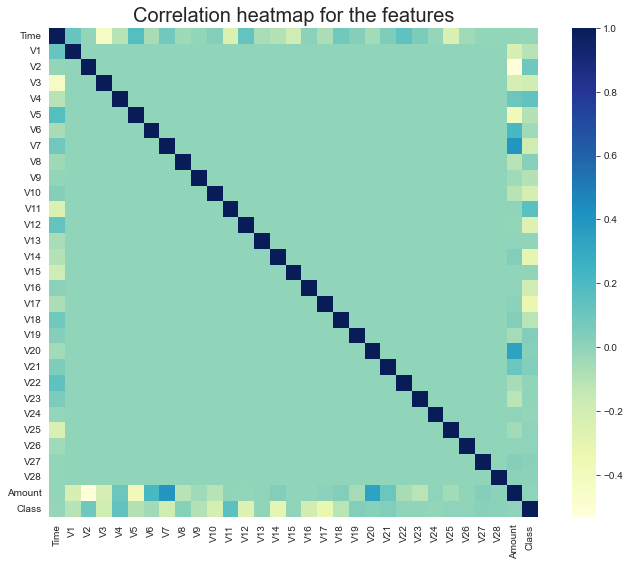

In [9]:
corrmat = cc_fraud.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

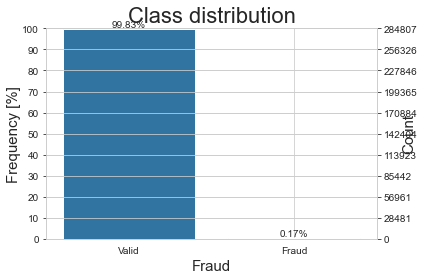

In [10]:
map_dict = {0:"Valid", 1:"Fraud"}
cc_fraud['Class'] = cc_fraud['Class'].map(map_dict)
ncount = len(cc_fraud)

plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(x = 'Class', data = cc_fraud)
#g.set_xticklabels(labels,rotation = 90)
plt.title("Class distribution", fontsize=22)
g.set_xlabel('Fraud', fontsize=15)
g.set_ylabel('Frequency [%]', fontsize=15, labelpad=25)
g.axes.grid('off')

g2 = g.twinx()
g2.yaxis.tick_left()
g.yaxis.tick_right()

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

g.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
g2.set_ylim(0,100)
g.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
g2.yaxis.set_major_locator(ticker.MultipleLocator(10))
g2.set_ylabel('Count', fontsize=15, labelpad=25)
g2.axes.grid('off')
plt.tight_layout()

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

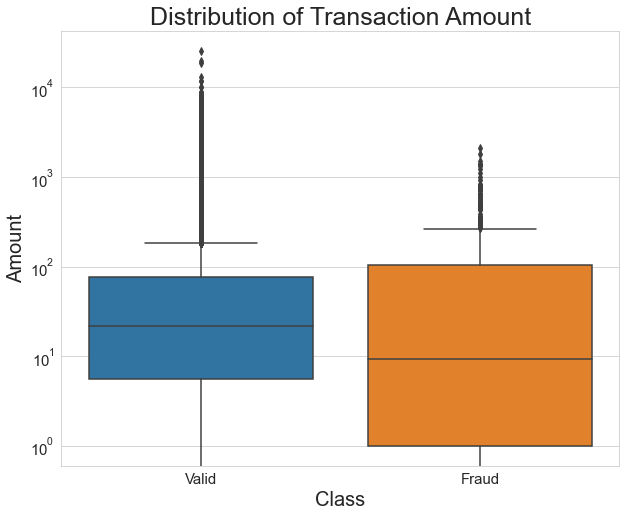

In [11]:
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = cc_fraud, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

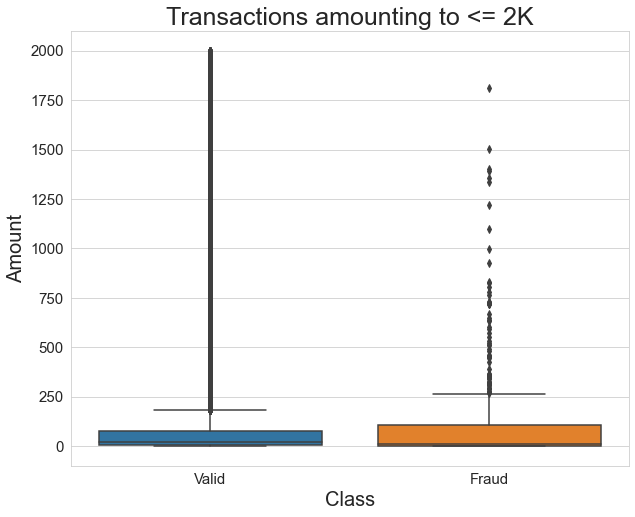

In [12]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=cc_fraud.loc[cc_fraud.Amount <= 2000,:], x = 'Class', y = 'Amount')
plt.title("Transactions amounting to <= 2K", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

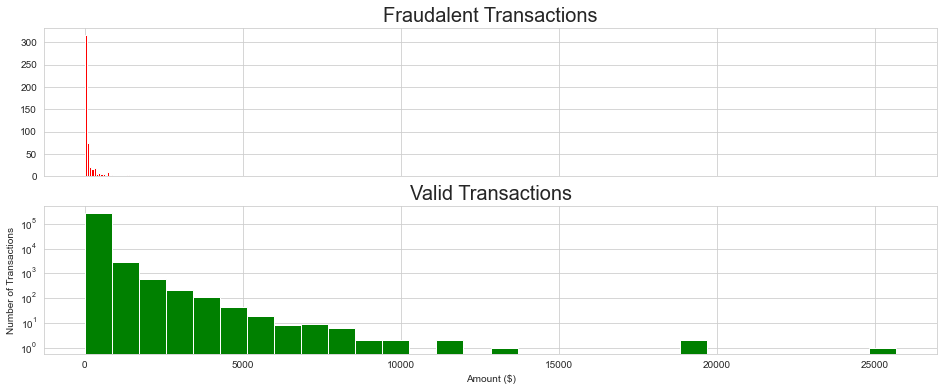

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))


ax1.hist(cc_fraud.Amount[cc_fraud.Class == 'Fraud'], bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(cc_fraud.Amount[cc_fraud.Class == 'Valid'], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [14]:
cc_fraud.loc[cc_fraud.Amount==0,:].Class.value_counts()*100/cc_fraud.shape[0]

Valid    0.631305
Fraud    0.009480
Name: Class, dtype: float64

In [15]:
def convert_time(sec):
    return datetime.datetime.fromtimestamp(sec)

cc_fraud_time = cc_fraud[['Time','Amount','Class']].copy()
cc_fraud_time['time'] = cc_fraud_time.Time.apply(convert_time)
timeDelta = datetime.datetime.utcnow() - datetime.datetime.now() 
cc_fraud_time['hour'] = cc_fraud_time.time + timeDelta
cc_fraud_time['hour'] = cc_fraud_time.hour.dt.hour
cc_fraud_time_grouped = cc_fraud_time.groupby(['hour','Class'])

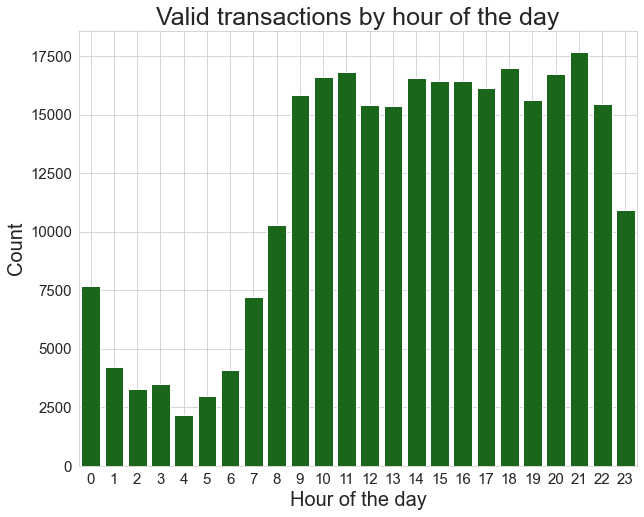

In [16]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 'Valid'], x = 'hour', color = 'green',
                 saturation = 0.6)
plt.title("Valid transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day', fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
g.axes.grid('off')

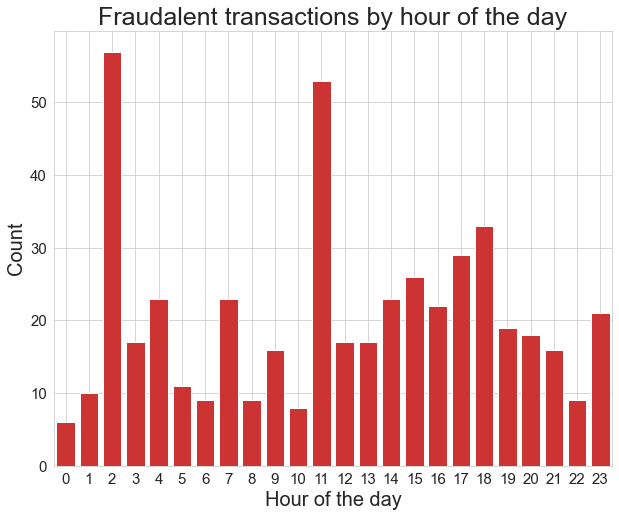

In [17]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 'Fraud'], x = 'hour', color = 'red',
                 saturation = 0.6)
plt.title("Fraudalent transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day',fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
plt.ylabel('Count')
g.axes.grid('off')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

<Figure size 720x576 with 0 Axes>

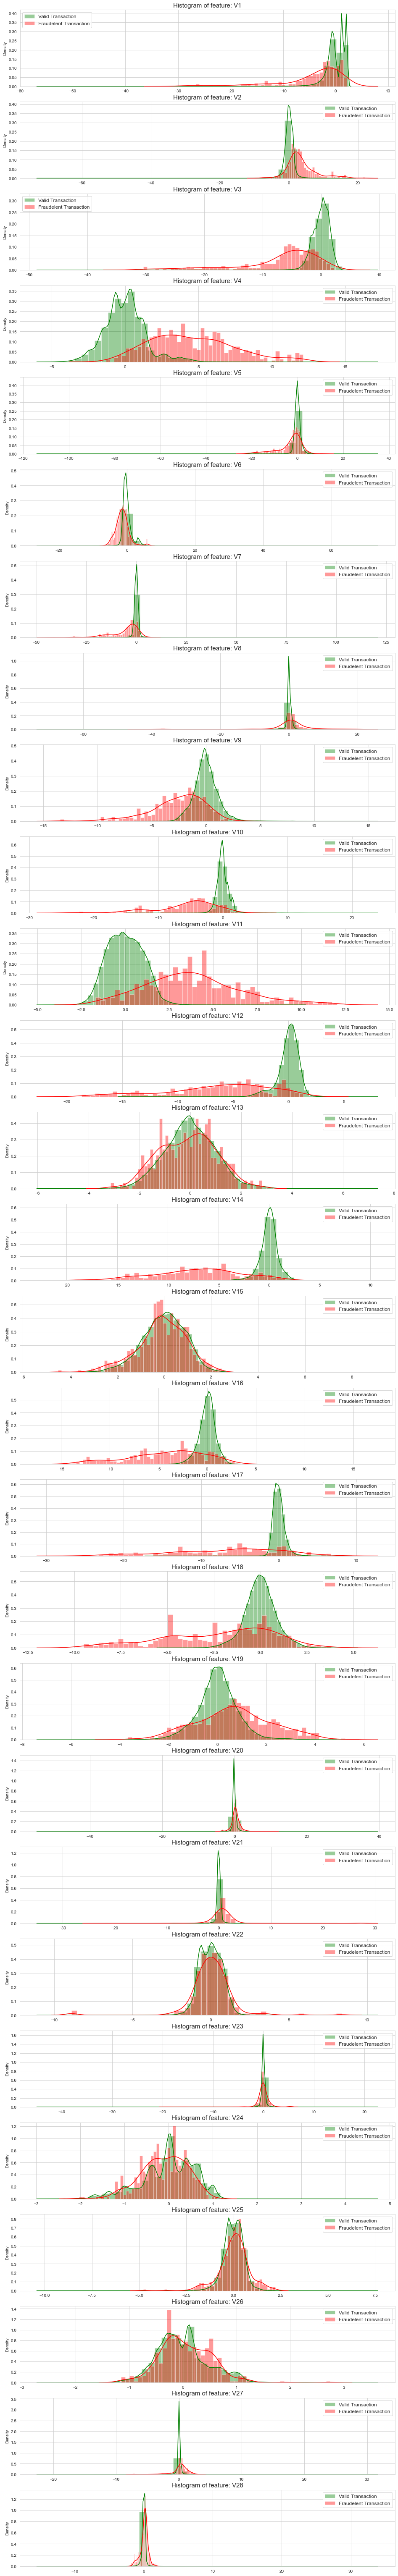

In [18]:
plt.clf()
pca_features = cc_fraud.columns[1:29]
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(cc_fraud[pca_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc_fraud[col][cc_fraud.Class == 'Valid'], bins=50, label='Valid Transaction', color='green')
    sns.distplot(cc_fraud[col][cc_fraud.Class == 'Fraud'], bins=50, label='Fraudelent Transaction', color='red')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col),fontsize=15)
    plt.legend(loc='best',fontsize=12)
plt.show()

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report,roc_auc_score
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve

import lightgbm as lgb
from scipy.stats import randint as sp_randint
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [21]:
cc_fraud.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62  Valid  
1  0.125895 -0.008983  0.014724    2.69  Valid  
2 -0.139097 -0.055353 -0.059752  378.66  Valid  
3 -0.221929  0.062723  0.061458  123.50  Valid  
4  0.502292  0.219422  0.215153   69.99  Valid  

[5 rows x 31 columns]

In [22]:
cc_fraud.shape

(284807, 31)

Valid    284315
Fraud       492
Name: Class, dtype: int64


<AxesSubplot:ylabel='count'>

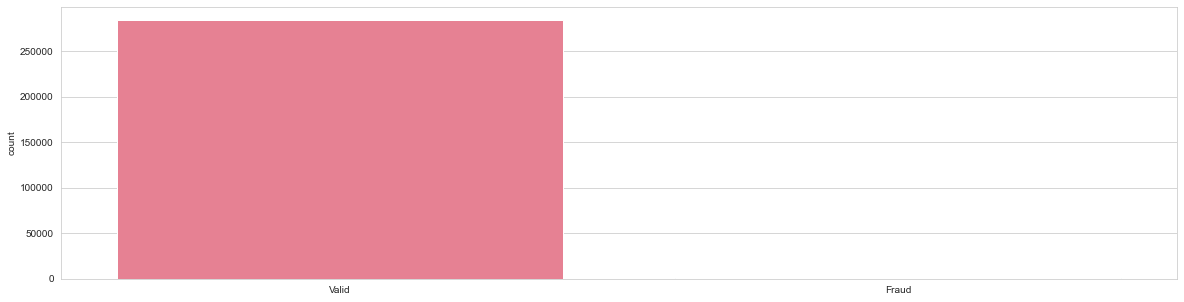

In [23]:
#count of target classes
print(cc_fraud['Class'].value_counts())
#count for target classes
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(cc_fraud.Class.values,palette='husl')

In [24]:
cc_fraud['Class'].value_counts(normalize=True)

Valid    0.998273
Fraud    0.001727
Name: Class, dtype: float64

In [25]:
cc_df = cc_fraud.copy()

<Figure size 720x576 with 0 Axes>

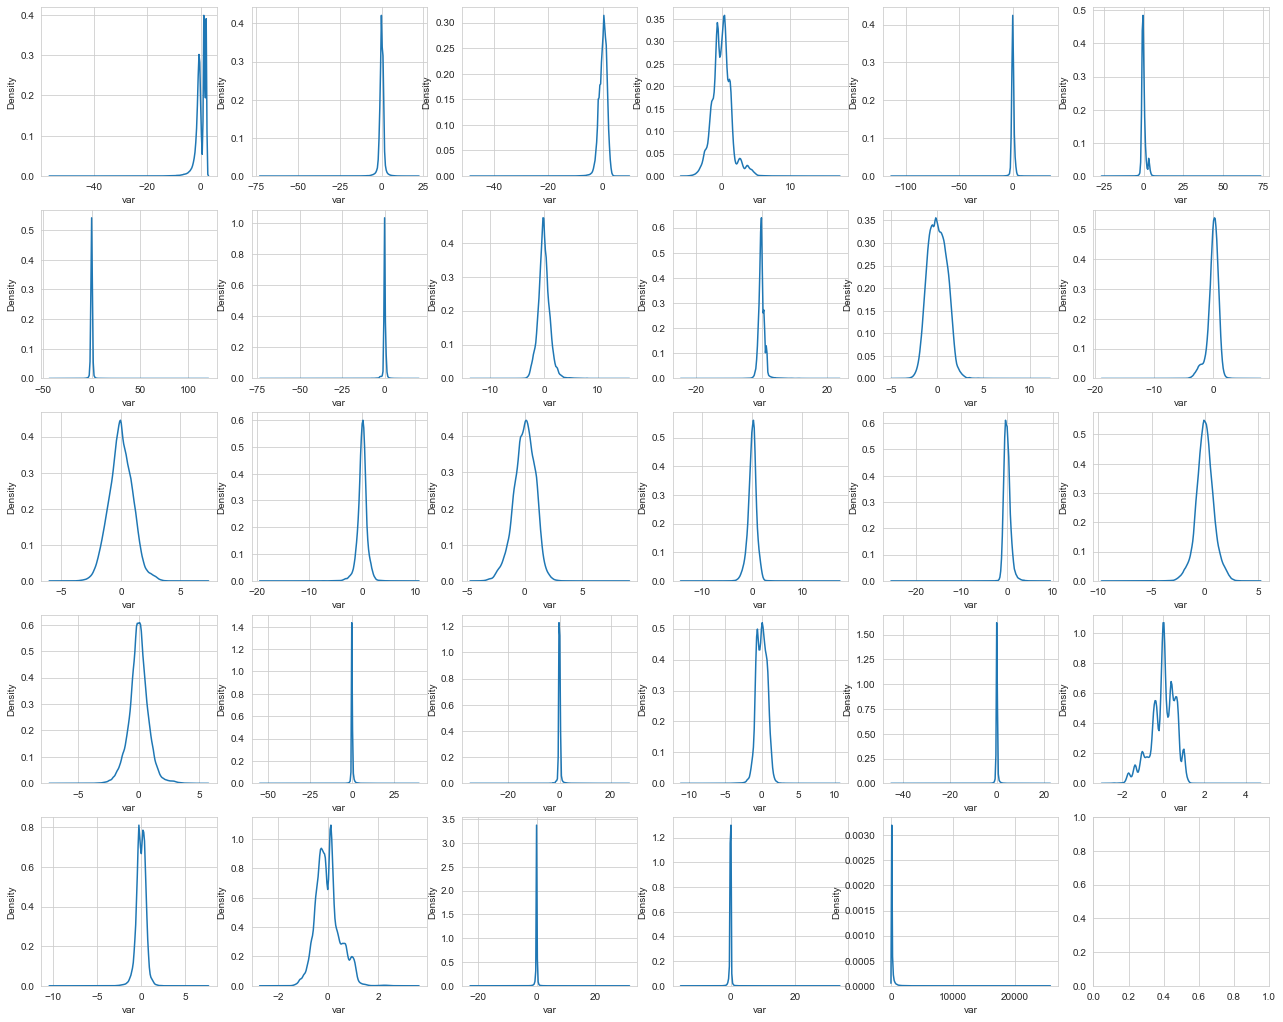

Wall time: 1min 16s


In [26]:
%%time
#Distribution of attributes
attributes=cc_df.columns.values[1:30]
def plot_attribute_distribution(attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(5,6,figsize=(22,18))
    
    for var in attributes:
        i+=1
        plt.subplot(5,6,i)
        sns.distplot(cc_df[var],hist=False)
        plt.xlabel('var',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

plot_attribute_distribution(attributes)

In [27]:
attributes=cc_df.columns.values[1:30]
correlations=cc_df[attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations=correlations[correlations['level_0']!=correlations['level_1']]
print(correlations)

    level_0 level_1             0
0        V3     V24  2.686834e-19
1       V24      V3  2.686834e-19
2       V22      V6  4.705235e-19
3        V6     V22  4.705235e-19
4       V16      V6  2.623672e-18
..      ...     ...           ...
807  Amount      V5  3.863563e-01
808  Amount      V7  3.973113e-01
809      V7  Amount  3.973113e-01
810      V2  Amount  5.314089e-01
811  Amount      V2  5.314089e-01

[812 rows x 3 columns]


In [28]:
#normalized the amount variable by using standard scaler
ss=StandardScaler()
#convert to numpy array
amount=np.array(cc_df['Amount']).reshape(-1,1)
#fit transform the data
amount_ss=ss.fit_transform(amount)
#Create a dataframe
amount_df=pd.DataFrame(amount_ss,columns=['Amount'])
amount_df.head()

Amount
0  0.244964
1 -0.342475
2  1.160686
3  0.140534
4 -0.073403

In [29]:
cc_df=cc_df.drop(['Amount'],axis=1)
cc_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  
0  0.128539 -0.189115  0.133558 -0.021053  Valid  
1  0.167170  0.125895 -0.008983  0.014724  Valid  
2 -0.327642 -0.139097 -0.055353 -0.059752  Valid  
3  0.647376 -0.221929  0.062723  0.061458  Valid  
4 -0.206010  0.502292  0.219422  0.215153  Valid  

[5 rows x 30 columns]

In [30]:
cc_df['Amount']=amount_df
cc_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class    Amount  
0 -0.189115  0.133558 -0.021053  Valid  0.244964  
1  0.125895 -0.008983  0.014724  Valid -0.342475  
2 -0.139097 -0.055353 -0.059752  Valid  1.160686  
3 -0.221929  0.062723  0.061458  Valid  0.140534  
4  0.502292  0.219422  0.215153  Valid -0.073403  

[5 rows x 31 columns]

In [31]:
%%time
#Training data
X=cc_df.drop(['Time','Class'],axis=1)
Y=cc_df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.20)
print('Shape of X_train :',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train :',y_test.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (227845, 29)
Shape of X_test: (56962, 29)
Shape of y_train : (56962,)
Shape of y_test : (56962,)
Wall time: 153 ms


In [36]:
%%time
#Logistic regression model for SMOTE
lg=LogisticRegression(random_state=42)
#fitting the smote model
lg.fit(X_train,y_train)

Wall time: 2.47 s


LogisticRegression(random_state=42)

In [47]:
score=lg.score(X_train,y_train)
print('Accuracy of the train :',score)

Accuracy of the train : 0.9992275450415853


In [48]:
pred=lg.predict(X_test)
print(pred)

['Valid' 'Valid' 'Valid' ... 'Valid' 'Valid' 'Valid']


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

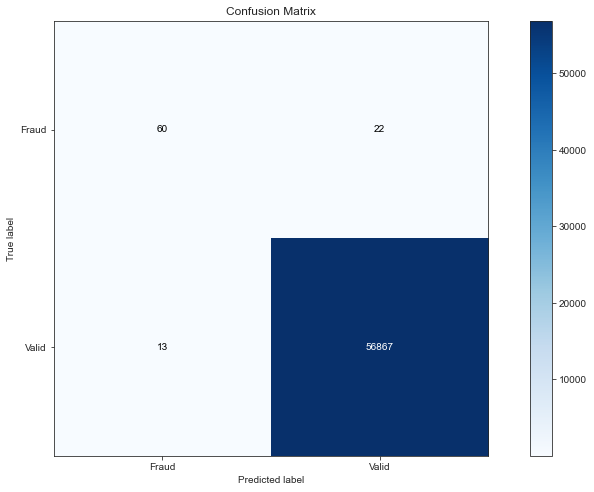

In [49]:
cm=confusion_matrix(y_test,pred)
#Plot the confusion matrix
plot_confusion_matrix(y_test,smote_pred,normalize=False,figsize=(15,8))

In [50]:
scores=classification_report(y_test,smote_pred)
print(scores)

              precision    recall  f1-score   support

       Fraud       0.82      0.73      0.77        82
       Valid       1.00      1.00      1.00     56880

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
from sklearn.metrics import accuracy_score

print("Accuracy of testing model : ",accuracy_score(y_test,pred))

Accuracy of testing model :  0.999385555282469
